<a href="https://colab.research.google.com/github/akaumov/pyplot-tutorial/blob/master/Pyplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The PyPlot tutorial

## Intro

Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.


Let's import our Pyplot library before we start

In [0]:
import matplotlib.pyplot as plt


Let's define some functions for tests

In [0]:
def square(x):
  return x*x

def cube(x):
  return x*x*x

Let's write function for generating test data sets

In [0]:
def get_dislay_data(func, start, end, step=1):
  x_values = []
  y_values = []

  for value in range(start, end, step):
    x_values.append(value)
    y_values.append(func(value))
  
  return (x_values, y_values)


square_x, square_y = get_dislay_data(square, -100, 101, 10)
cube_x, cube_y = get_dislay_data(cube, -100, 101, 10)

Let's display our qudratic function's  test data set

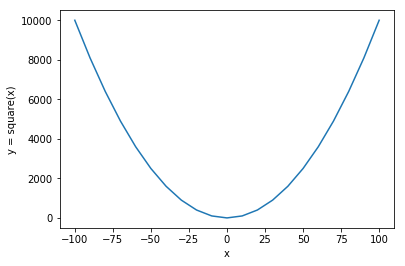

In [5]:
plt.xlabel('x')
plt.ylabel('y = square(x)')
plt.plot(square_x, square_y)
plt.show()

Let's limit viewport of our plot

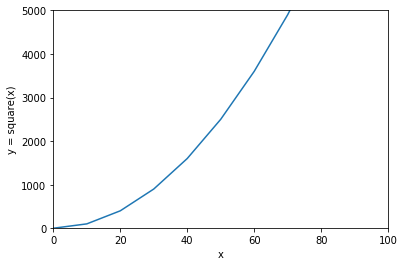

In [6]:
plt.xlabel('x')
plt.ylabel('y = square(x)')
plt.plot(square_x, square_y)
plt.axis(xmin = 0, xmax = 100, ymin = 10, ymax=5000)
plt.show()

## Setting custom styles

Let's change styles of our plot

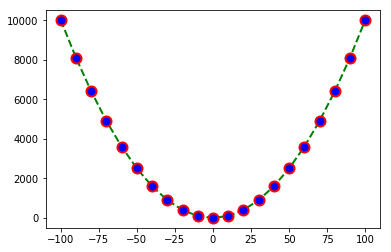

In [7]:
plt.plot(
    square_x, 
    square_y, 
    color='green', 
    marker='o', 
    linestyle='dashed', 
    linewidth=2, 
    markersize=10, 
    markeredgecolor='red', 
    markeredgewidth=2, 
    markerfacecolor='blue'
)
plt.show()

Short definition of styles (red dashed line with trianle markers)

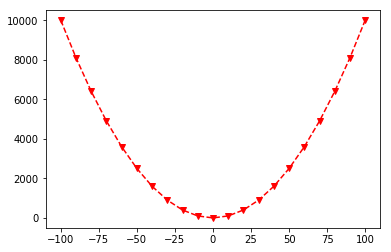

In [8]:
plt.plot(square_x, square_y, 'rv--')
plt.show()

## Plotting multiple sets of data

Let's draw mulitple data sets in one plot

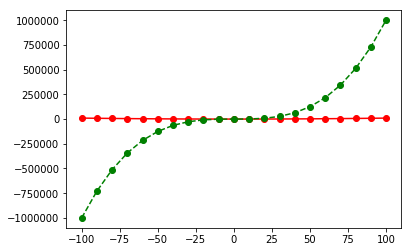

In [9]:
plt.plot(square_x, square_y, 'ro-', cube_x, cube_y, 'go--')
plt.show()

Our you can write it in more readable way

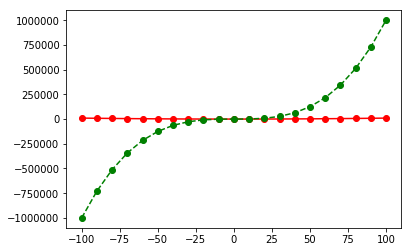

In [10]:
plt.plot(square_x, square_y, 'ro-')
plt.plot(cube_x, cube_y, 'go--')
plt.show()

## Plotting labeled data

There is a convinient way for plotting data. You can pass object to the plot function and provide x and y labels names.

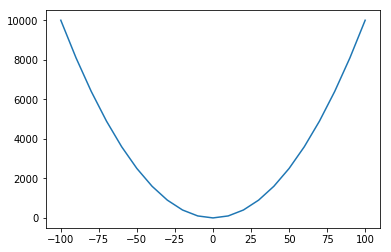

In [11]:
square_data = {
    'xlabel': square_x,
    'ylabel': square_y
}
plt.plot('xlabel', 'ylabel', data=square_data)
plt.show()

## Using NumPy arrays

The PyPlot functions can use NumPy arrays. In general all lists inside PyPlot convert to NumPy arrays

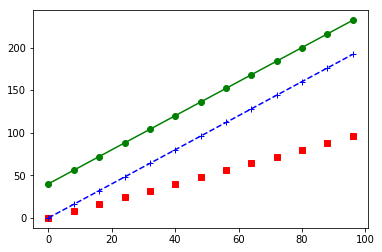

In [12]:
import numpy as np

#Create range
t = np.arange(0, 100, 8)

plt.plot(t, t, 'rs', t, t*2, 'b+--', t, t*2 + 40, 'go-')
plt.show()

## Categorical plotting

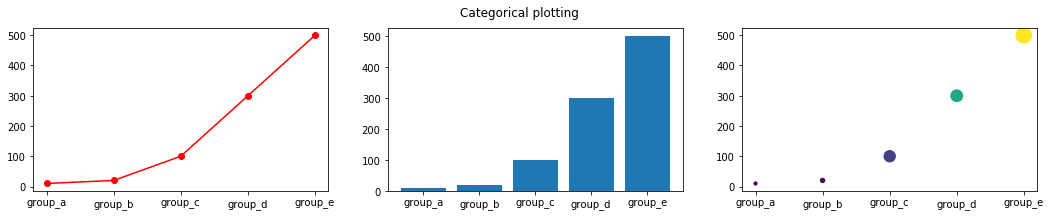

In [33]:
names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [10, 20, 100, 300, 500]

#set figure size
plt.figure(figsize=[18,3])

#add new sub plot nrows=1, ncols=3, index=1
plt.subplot(1, 3, 1)
#draw on new subplot
plt.plot(names, values, 'ro-')

#add new sub plot nrows=1, ncols=3, index=2
plt.subplot(1, 3, 2)
plt.bar(names, values)

#add new sub plot nrows=1, ncols=3, index=3
plt.subplot(1, 3, 3)
plt.scatter(
    names, #x values
    values, #y values
    c=values, #markers colors
    s=[10,20,130,140,250] #markers sizes
)
plt.suptitle('Categorical plotting')
plt.show()

## Creating subplots

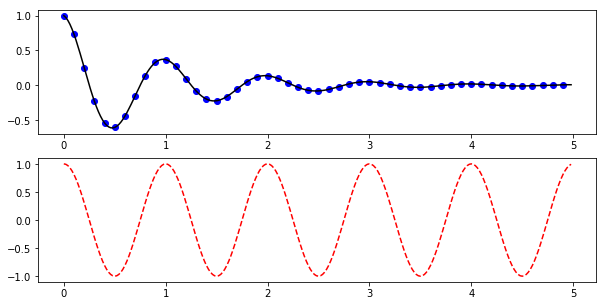

In [36]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


## Working with text

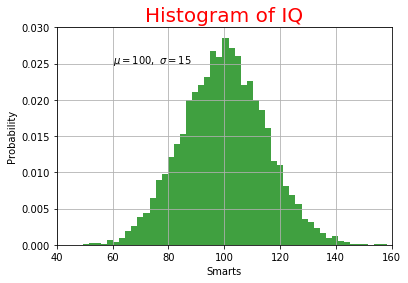

In [42]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')

# All text functions return matplotlib.text.Text instance
# so you  can modify it by using setp function
title = plt.title('Histogram of IQ')
plt.setp(title, color='red', fontsize=20)

plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Annotating text

The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

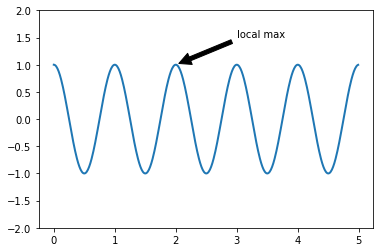

In [43]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. This is commonly used if data spans many orders of magnitude. Changing the scale of an axis is easy:

plt.xscale('log')
An example of four plots with the same data and different scales for the y axis is shown below.

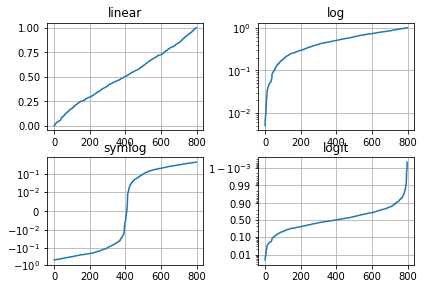

In [44]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()